# Análise de Camadas - Transfer Learning

In [1]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [3]:
model = VGG16()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

### 1 - Lista de camadas do modelo

In [4]:
model.layers

### 2 - Podemos capturar os filtros de qualquer camada:

In [5]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, 'com shape:' ,filters.shape)

block1_conv1 com shape: (3, 3, 3, 64)
block1_conv2 com shape: (3, 3, 64, 64)
block2_conv1 com shape: (3, 3, 64, 128)
block2_conv2 com shape: (3, 3, 128, 128)
block3_conv1 com shape: (3, 3, 128, 256)
block3_conv2 com shape: (3, 3, 256, 256)
block3_conv3 com shape: (3, 3, 256, 256)
block4_conv1 com shape: (3, 3, 256, 512)
block4_conv2 com shape: (3, 3, 512, 512)
block4_conv3 com shape: (3, 3, 512, 512)
block5_conv1 com shape: (3, 3, 512, 512)
block5_conv2 com shape: (3, 3, 512, 512)
block5_conv3 com shape: (3, 3, 512, 512)


#### 2.1 - Escolhendo uma camada para plotar os filtros (kernels e bisases)

In [6]:
filters, biases = model.layers[16].get_weights() # Segunda camada de Convolução

#### 2.2 - Precisamos normalizar os filtros entre 0 e 1 para visualizar

In [7]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

#### 2.3 - Realizando os plots

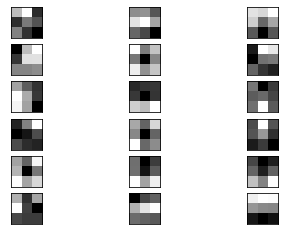

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

n_filters, ix = 6, 1

for i in range(n_filters):

    f = filters[:, :, :, i]
    
    for j in range(3):
        
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

plt.show()

# 3 - E os mapas de *features*?

In [9]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    
    if 'conv' not in layer.name:
        continue
    
    print(i, layer.name, 'com shape',layer.output.shape)

1 block1_conv1 com shape (?, 224, 224, 64)
2 block1_conv2 com shape (?, 224, 224, 64)
4 block2_conv1 com shape (?, 112, 112, 128)
5 block2_conv2 com shape (?, 112, 112, 128)
7 block3_conv1 com shape (?, 56, 56, 256)
8 block3_conv2 com shape (?, 56, 56, 256)
9 block3_conv3 com shape (?, 56, 56, 256)
11 block4_conv1 com shape (?, 28, 28, 512)
12 block4_conv2 com shape (?, 28, 28, 512)
13 block4_conv3 com shape (?, 28, 28, 512)
15 block5_conv1 com shape (?, 14, 14, 512)
16 block5_conv2 com shape (?, 14, 14, 512)
17 block5_conv3 com shape (?, 14, 14, 512)


#### 3.1 - "Redefinindo" o modelo

In [10]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [11]:
model2 = Model(inputs=model.inputs, outputs=model.layers[13].output)

In [12]:
img = load_img('cat.jpeg', target_size=(224, 224))

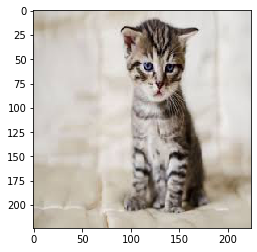

In [13]:
plt.imshow(img, cmap='gray')

In [14]:
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [15]:
img.shape

(1, 224, 224, 3)

In [16]:
feature_maps = model2.predict(img)

In [17]:
feature_maps.shape

(1, 28, 28, 512)

In [18]:
square = 8
ix = 1

/home/stefanini/IESB- POS IA/pos-ia/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


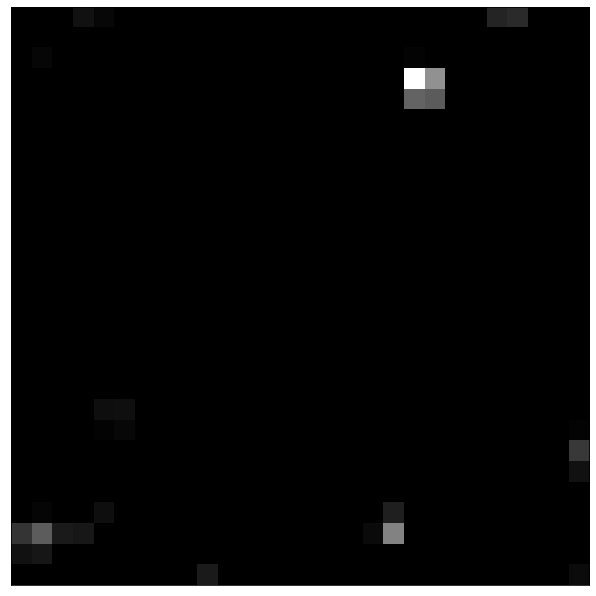

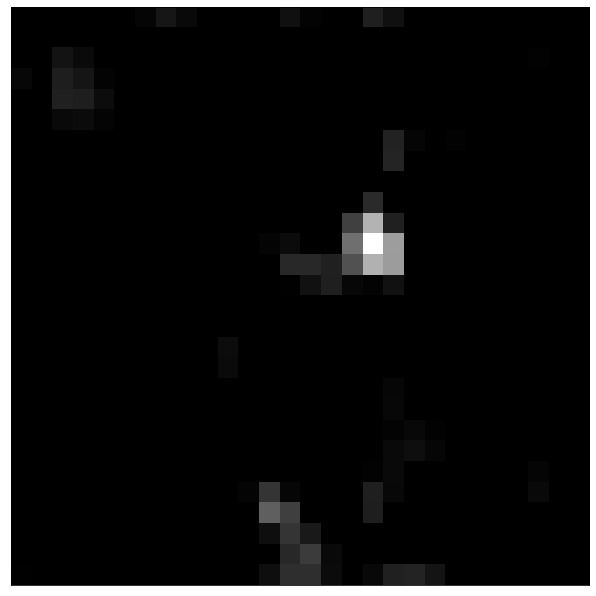

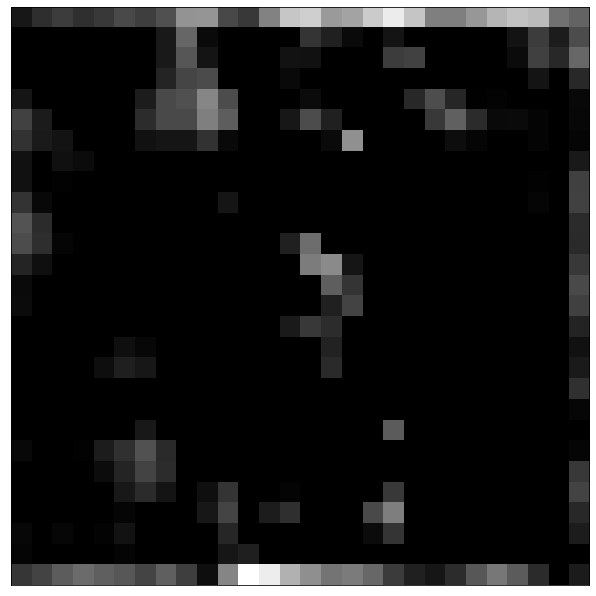

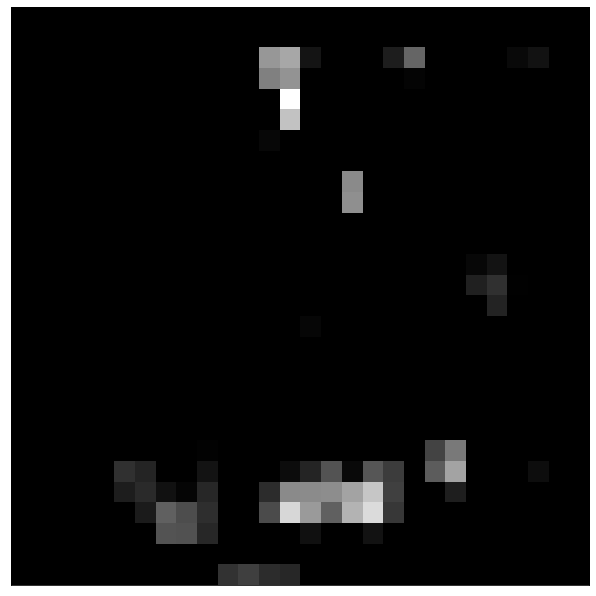

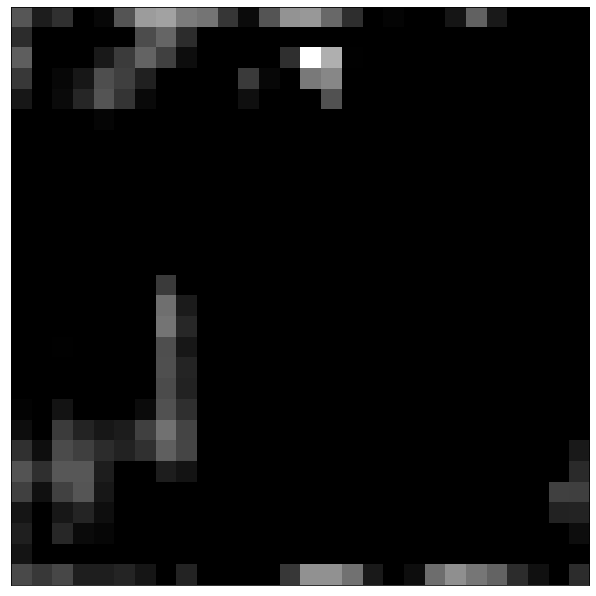

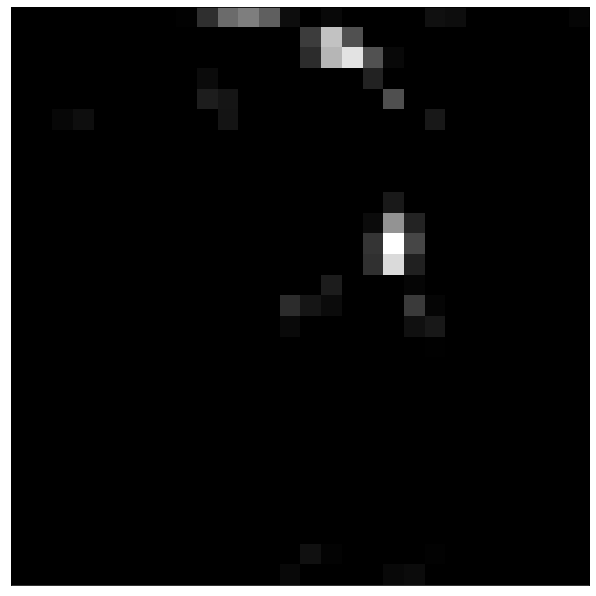

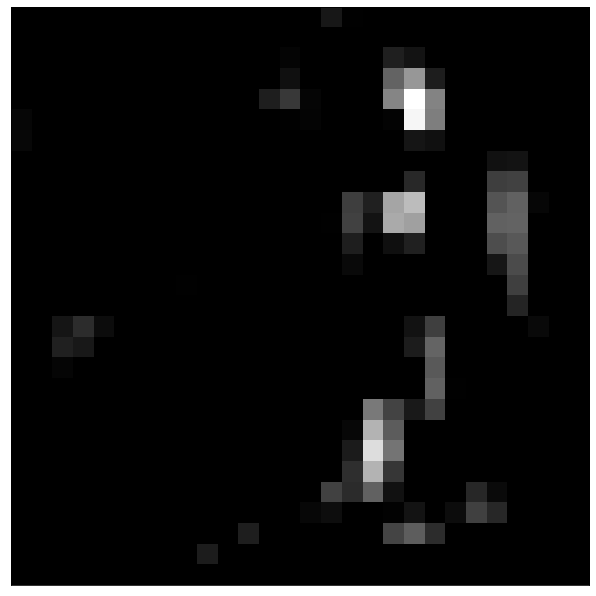

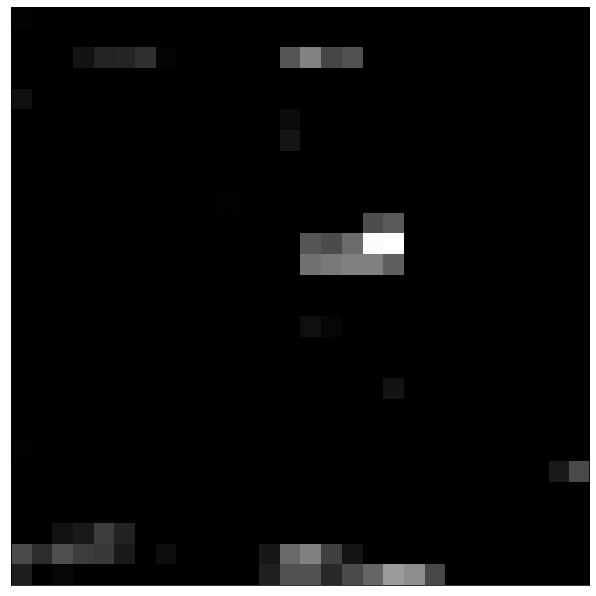

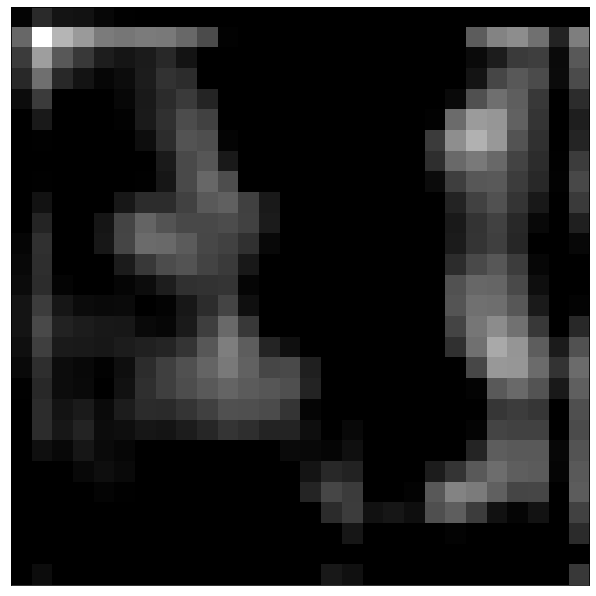

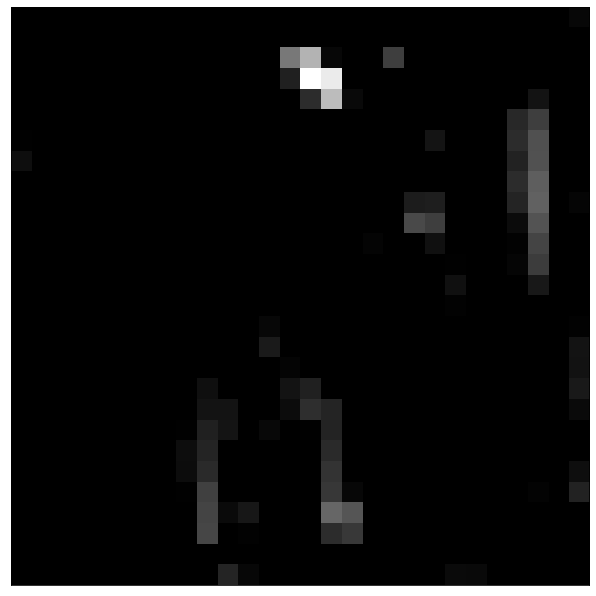

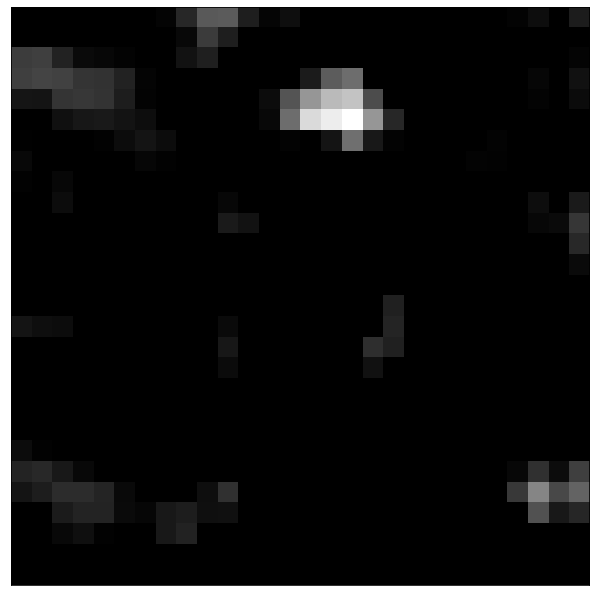

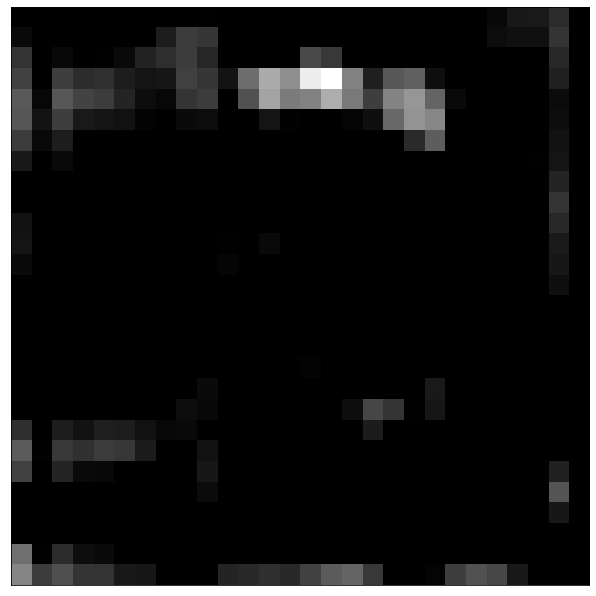

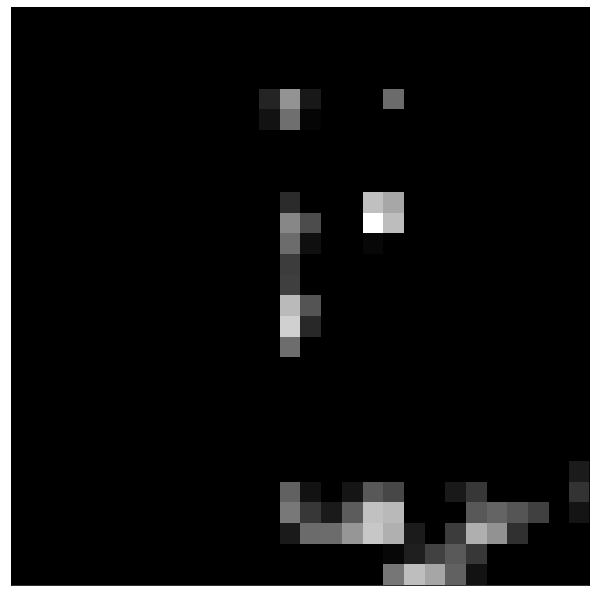

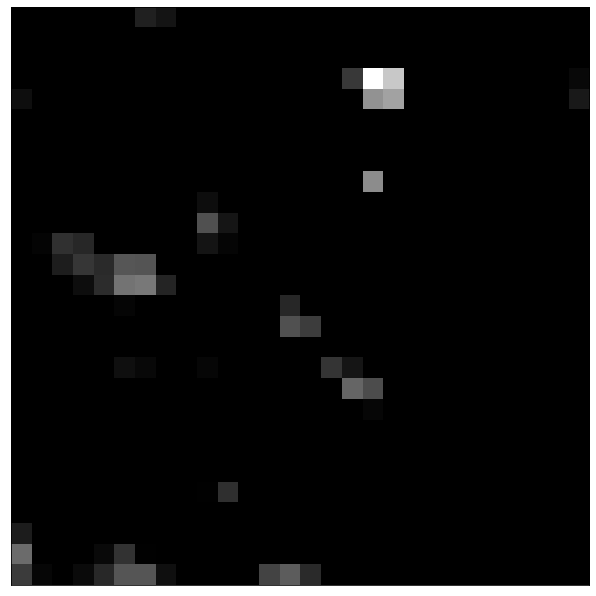

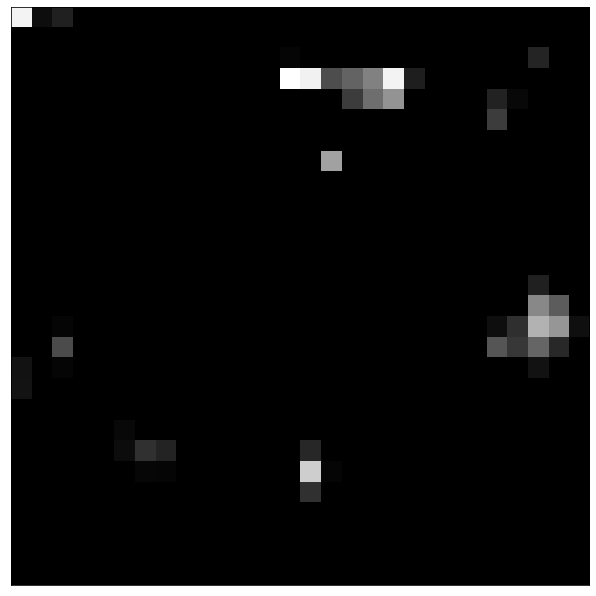

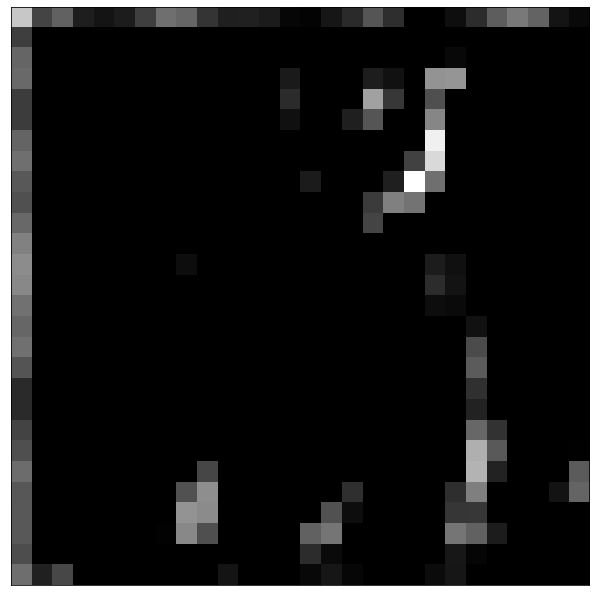

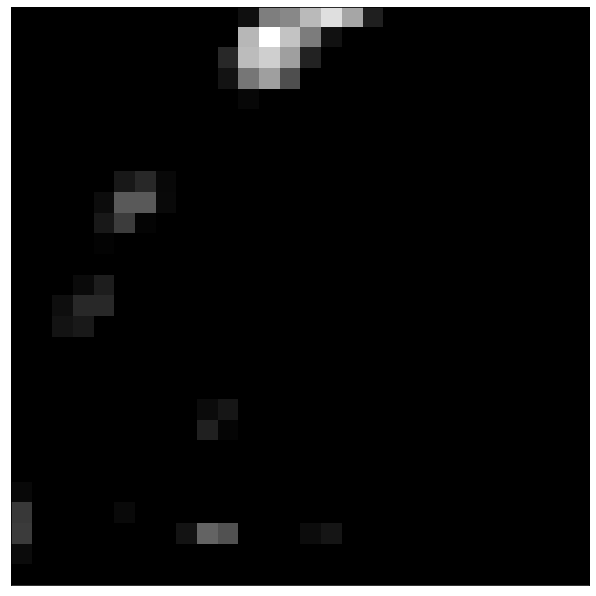

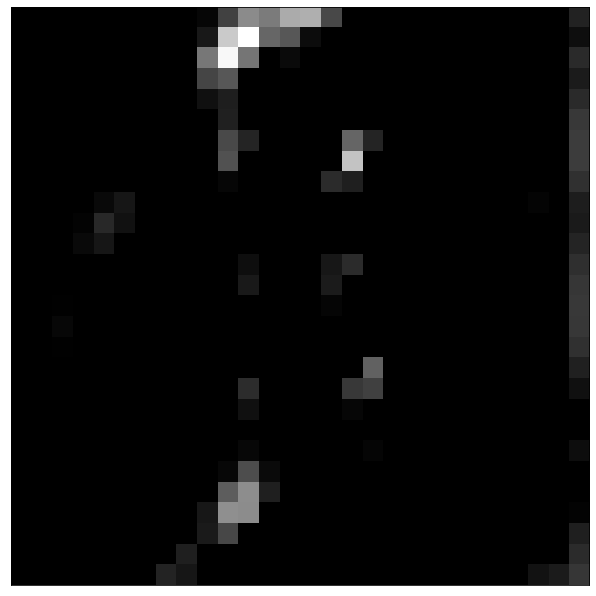

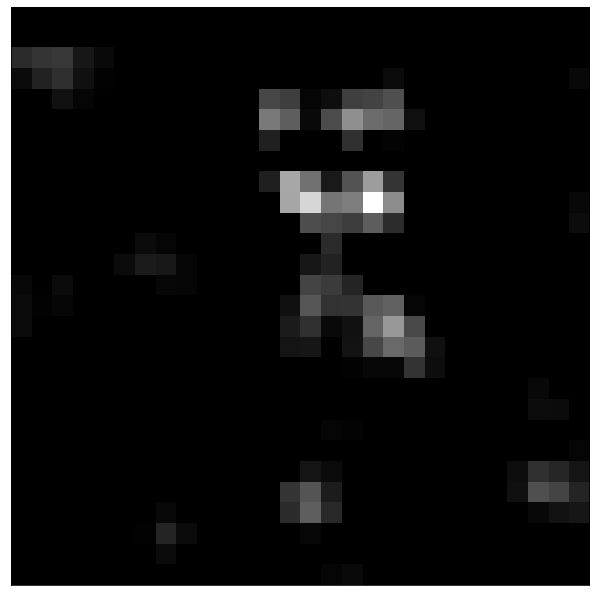

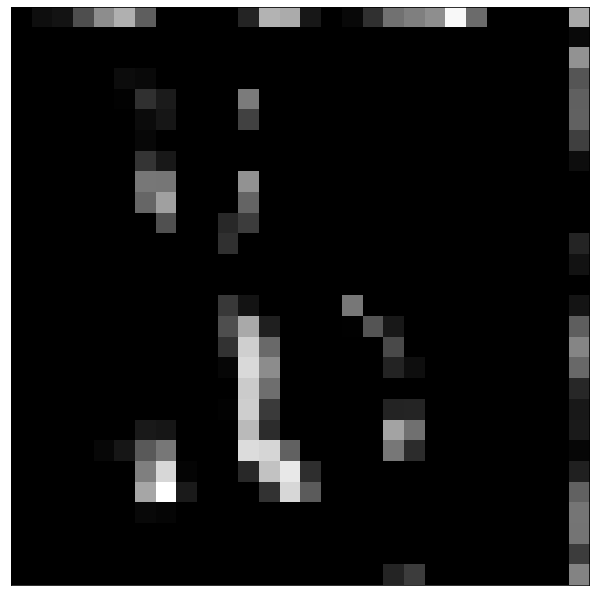

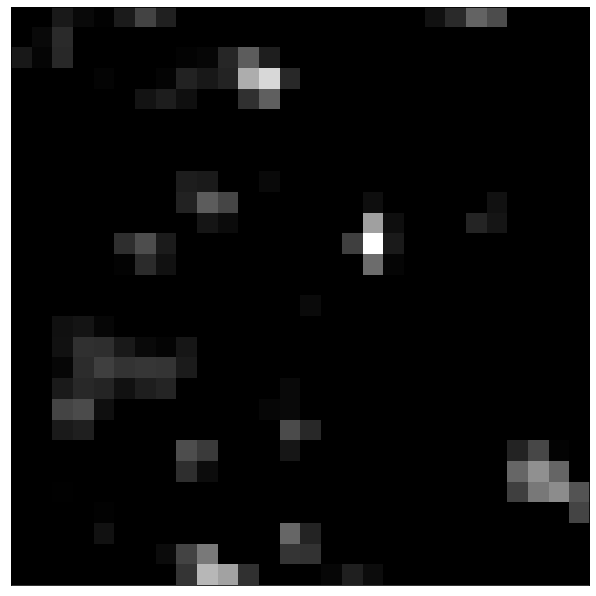

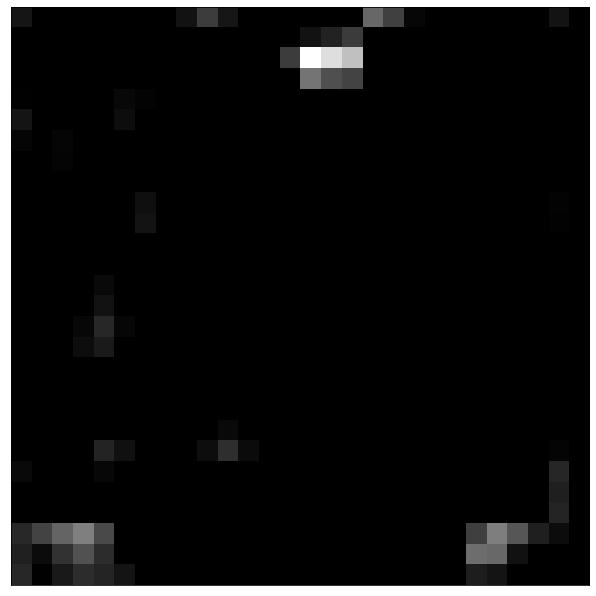

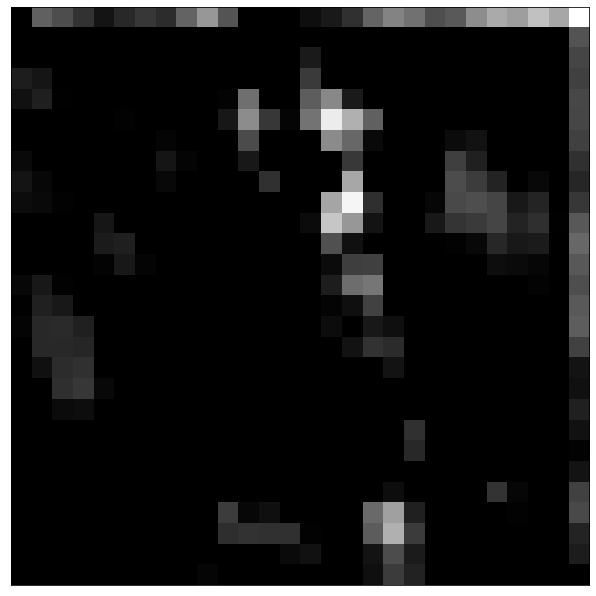

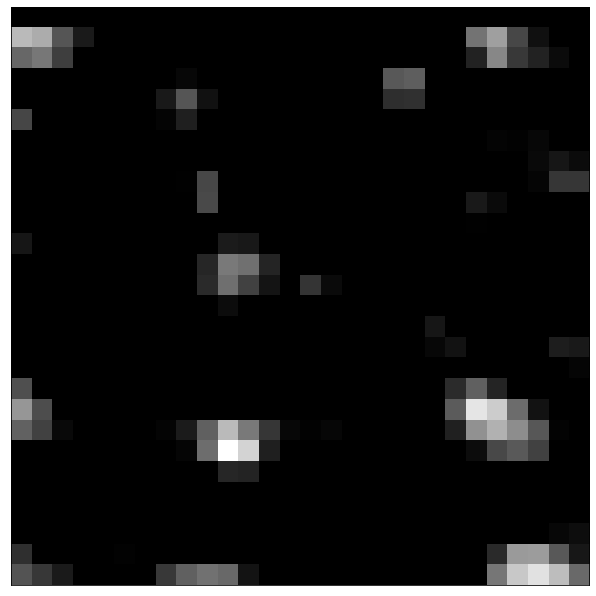

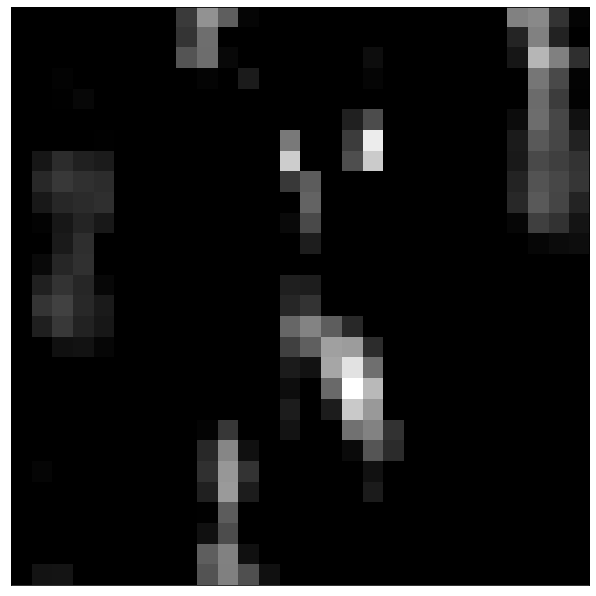

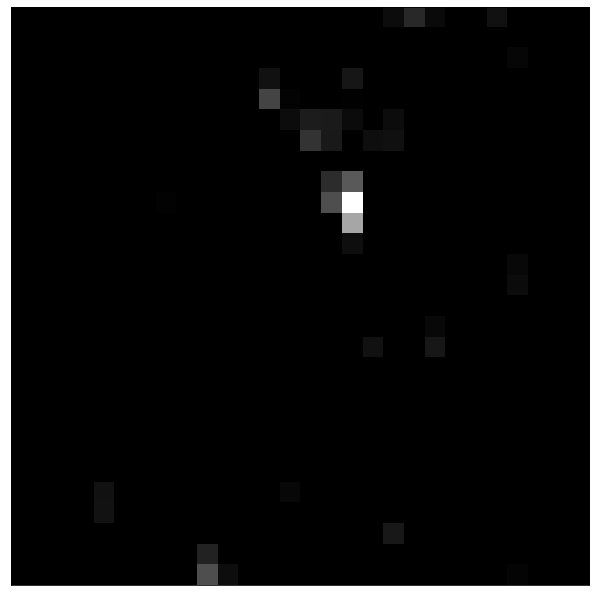

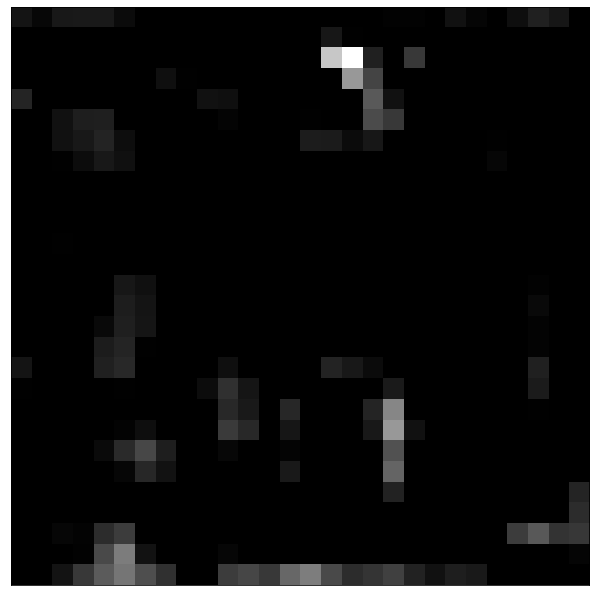

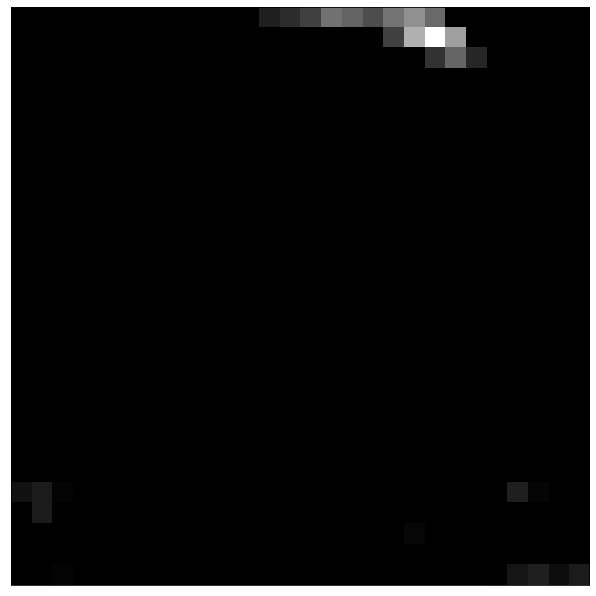

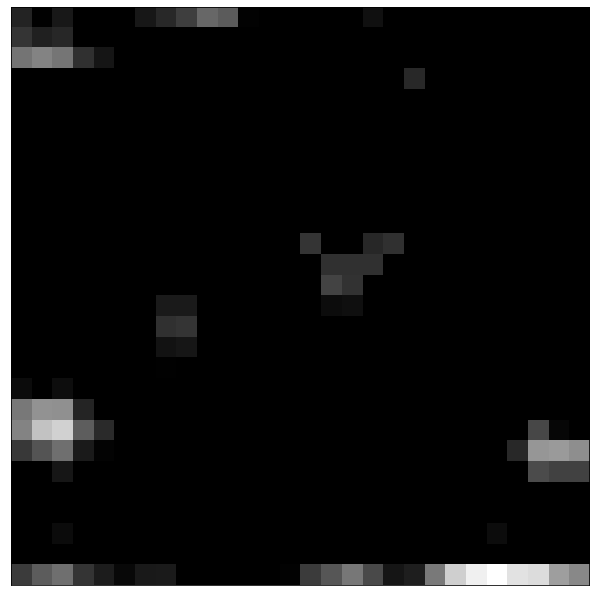

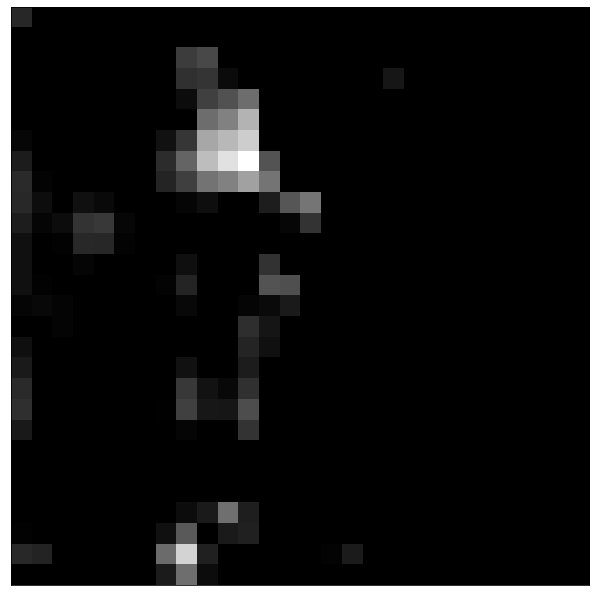

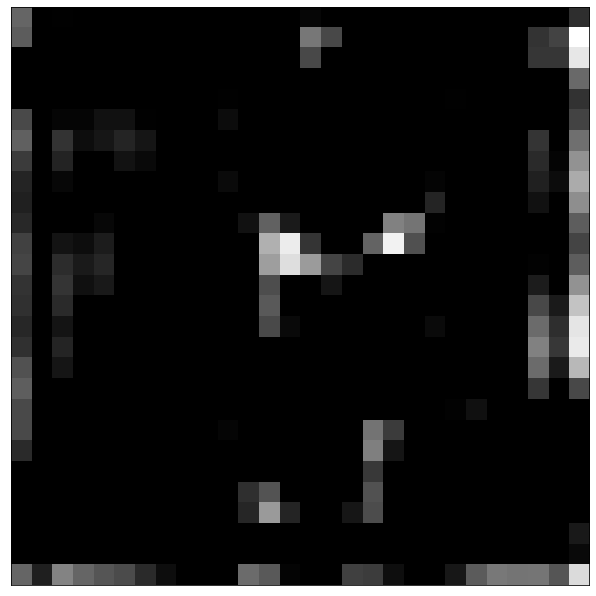

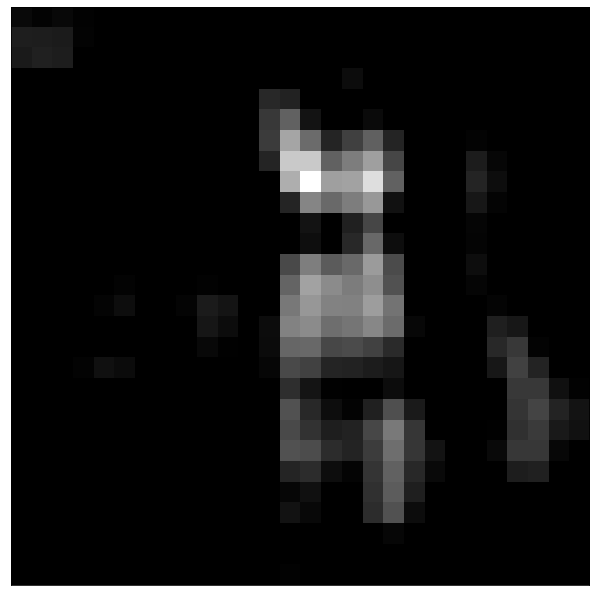

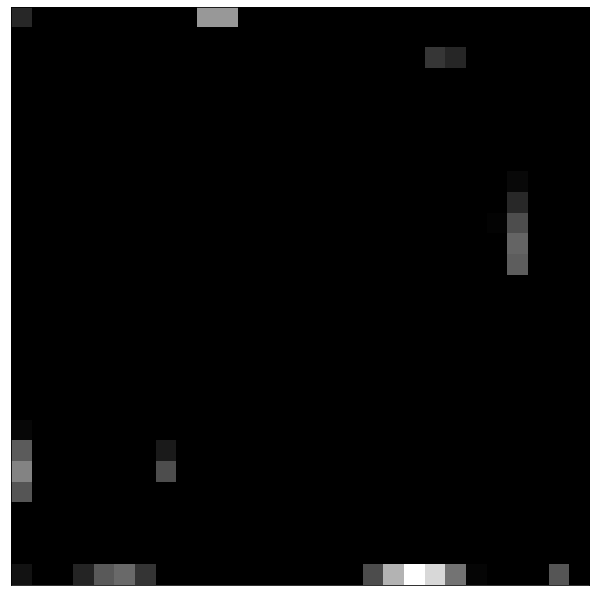

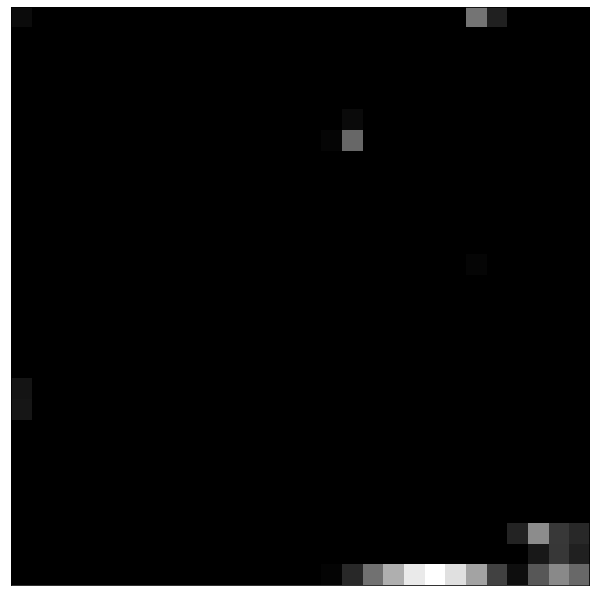

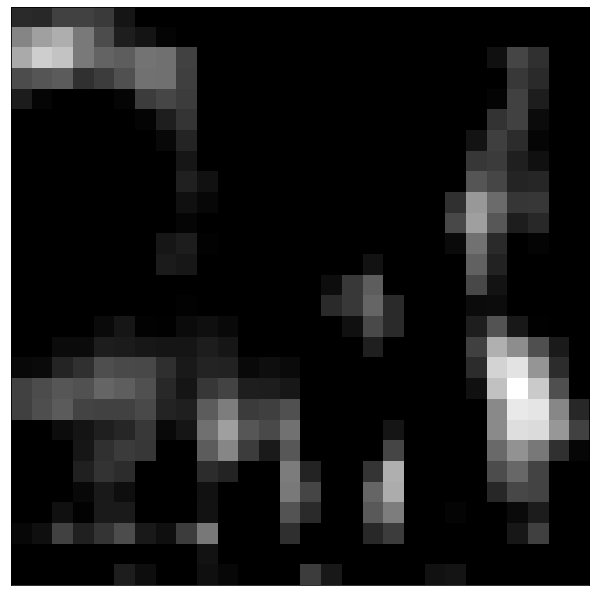

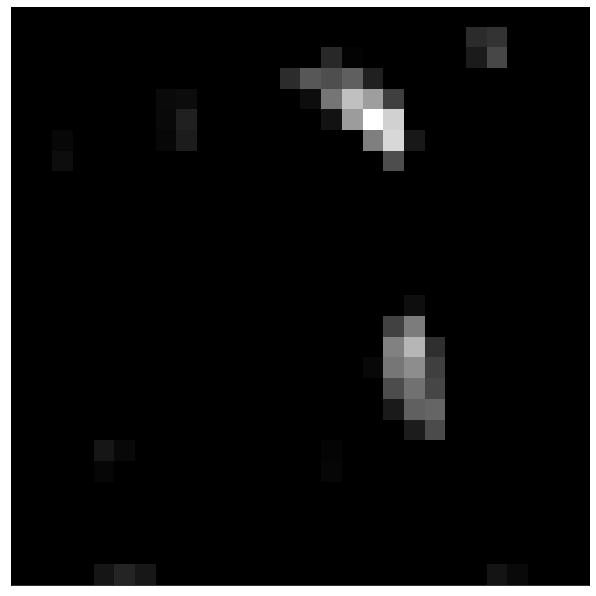

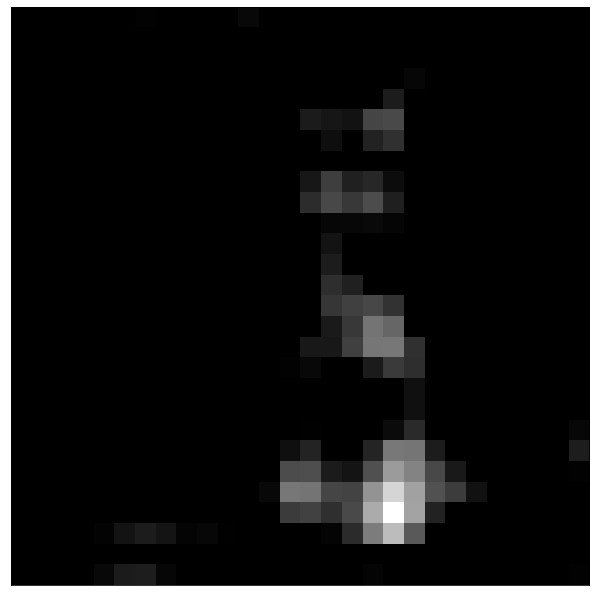

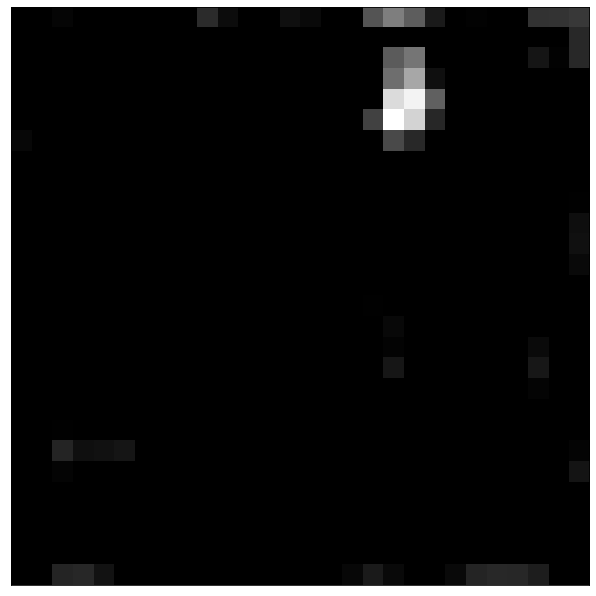

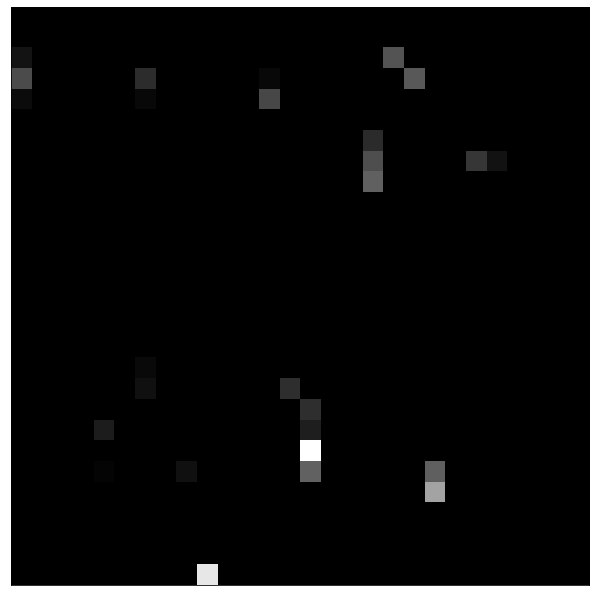

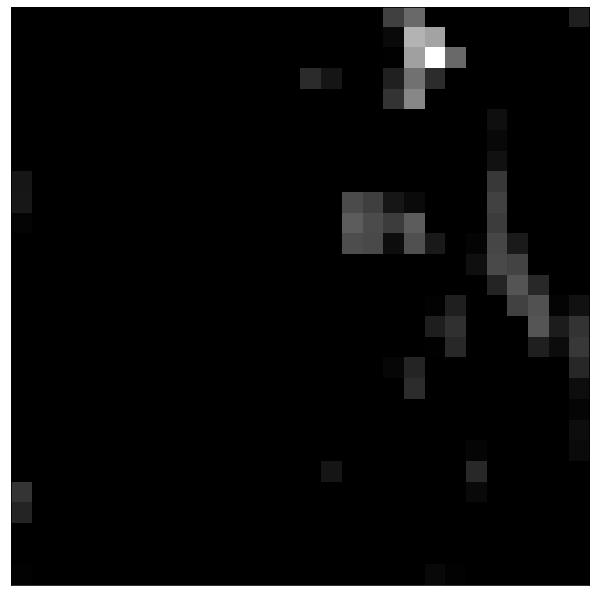

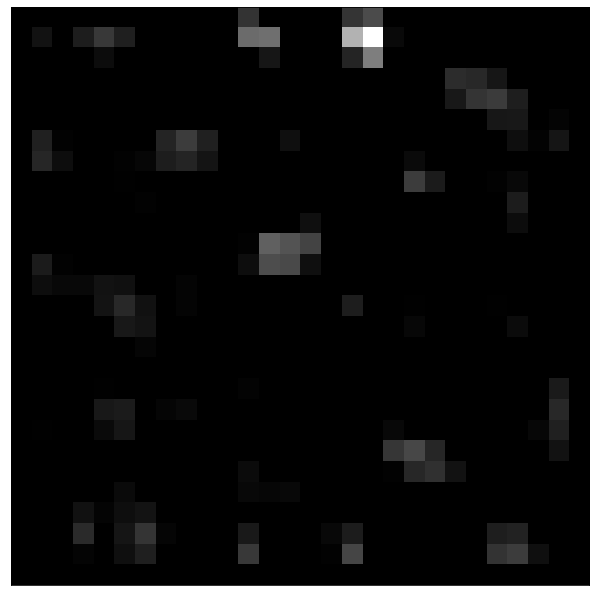

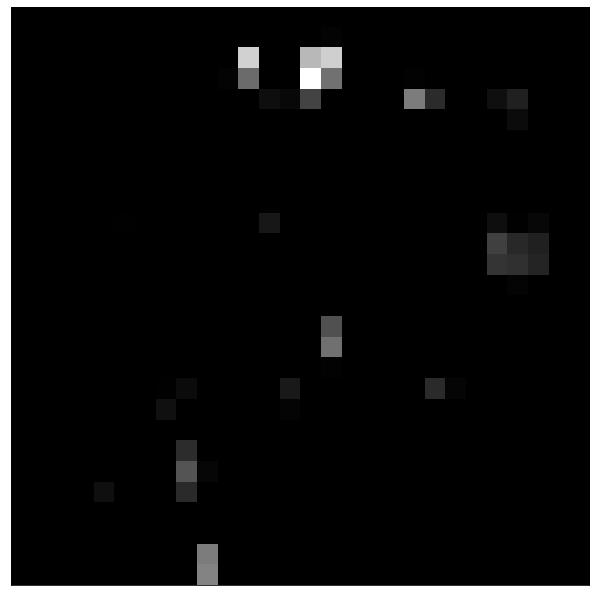

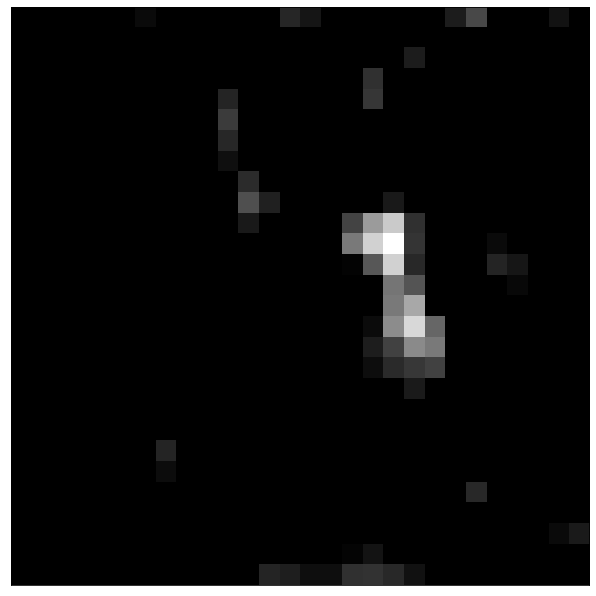

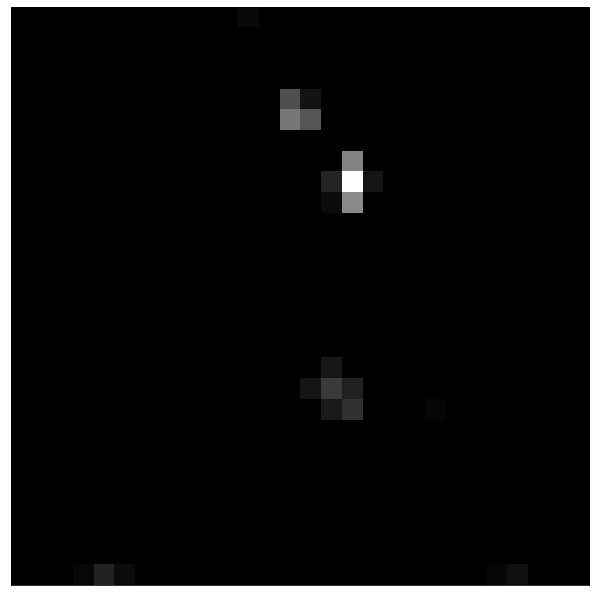

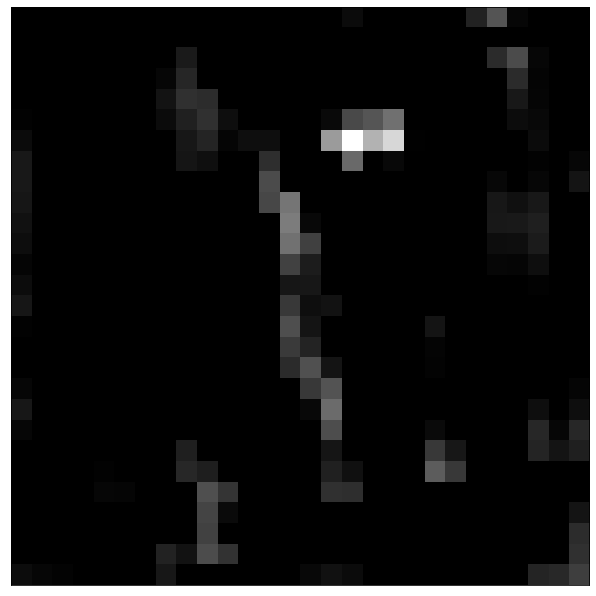

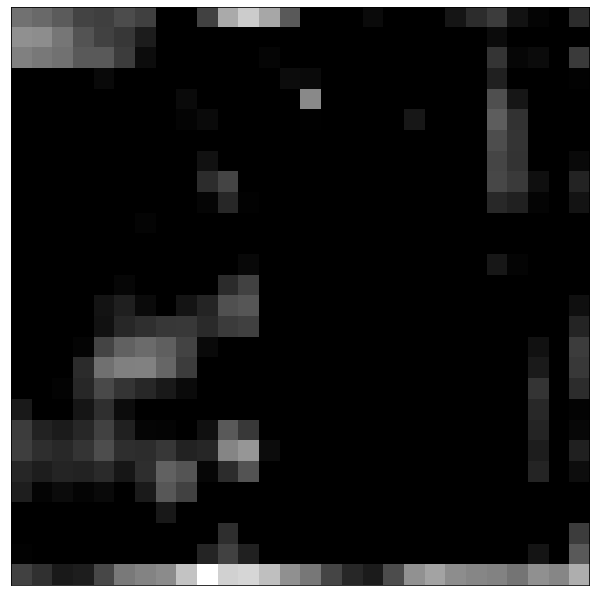

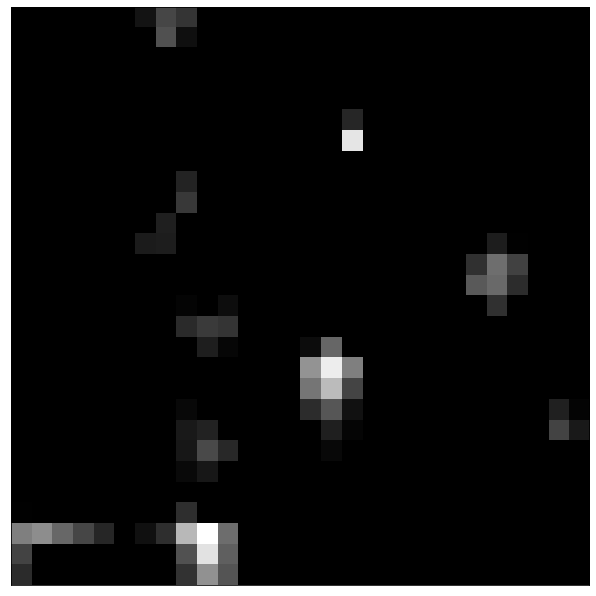

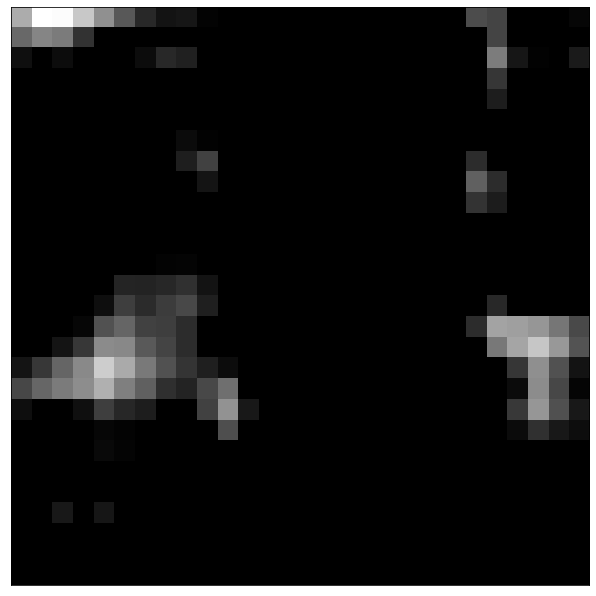

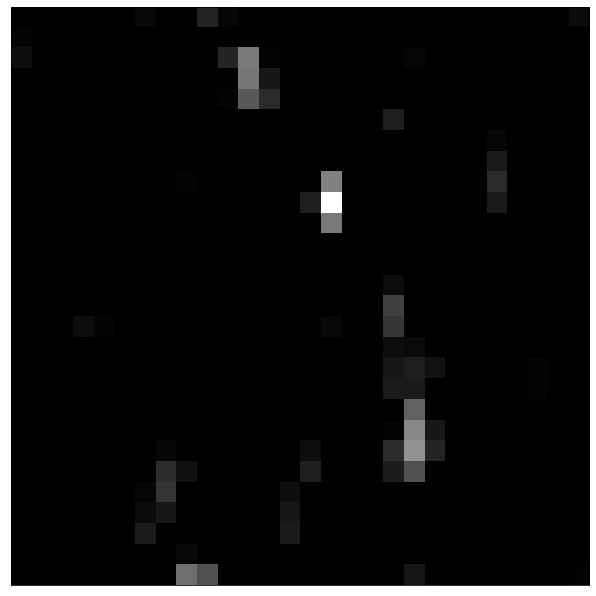

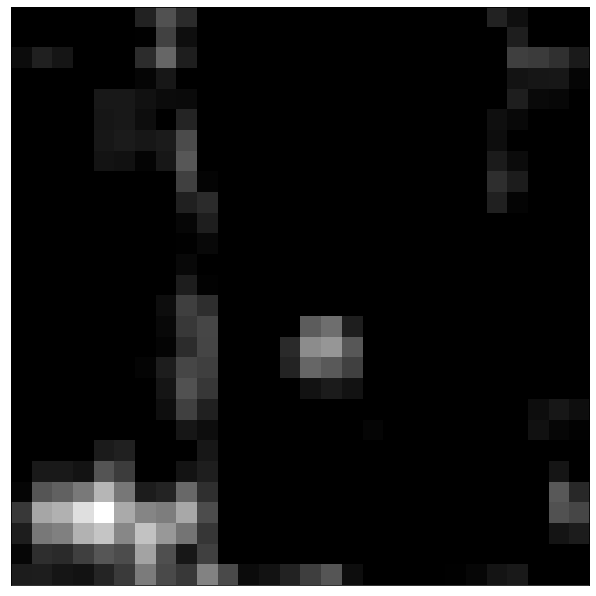

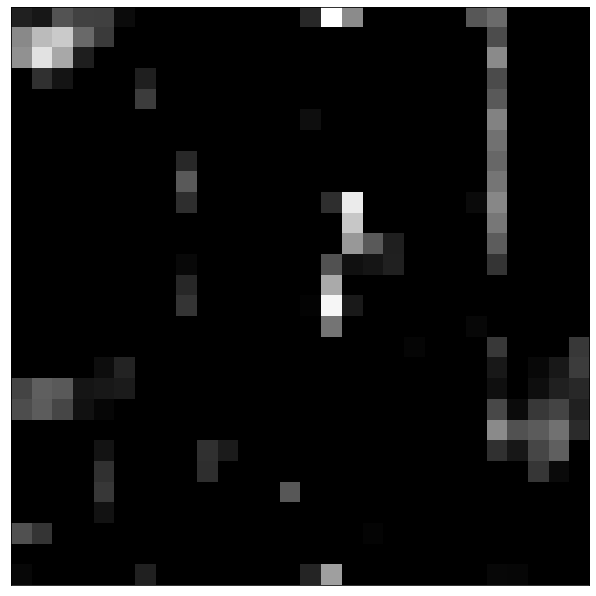

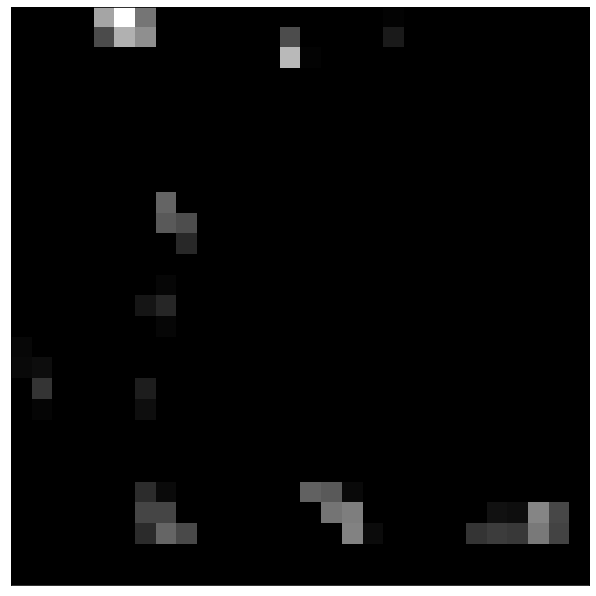

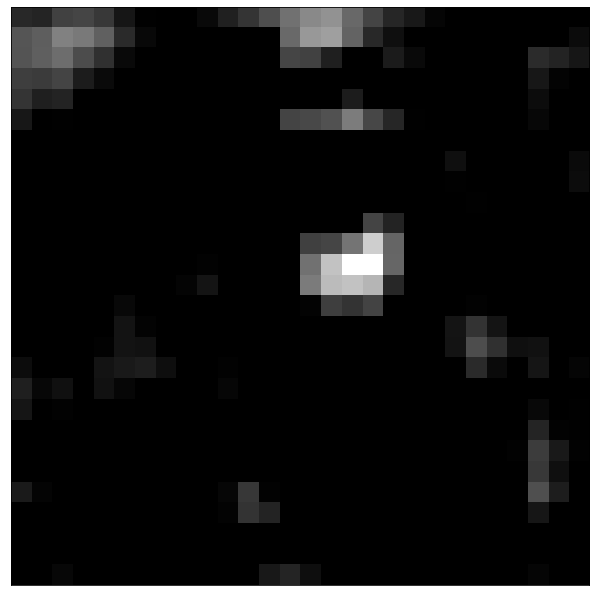

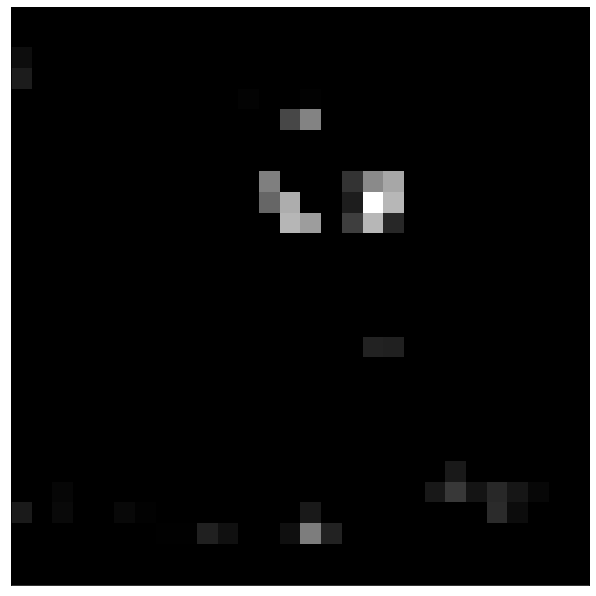

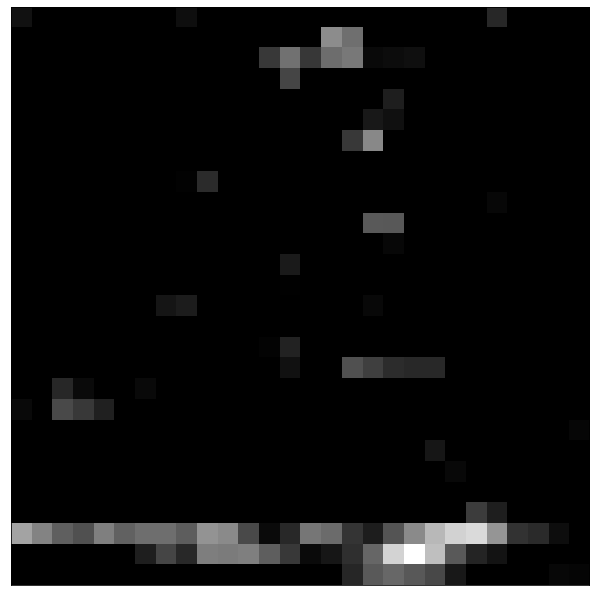

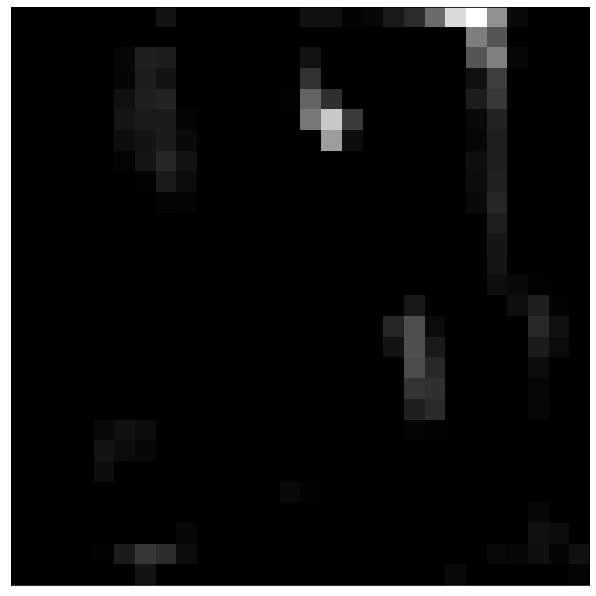

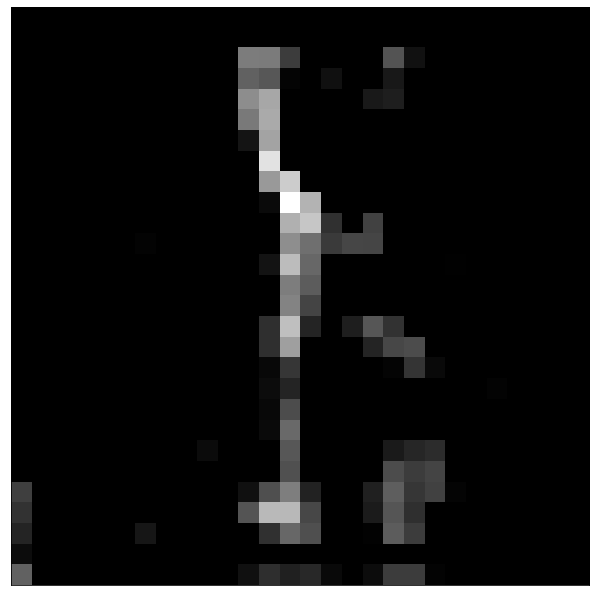

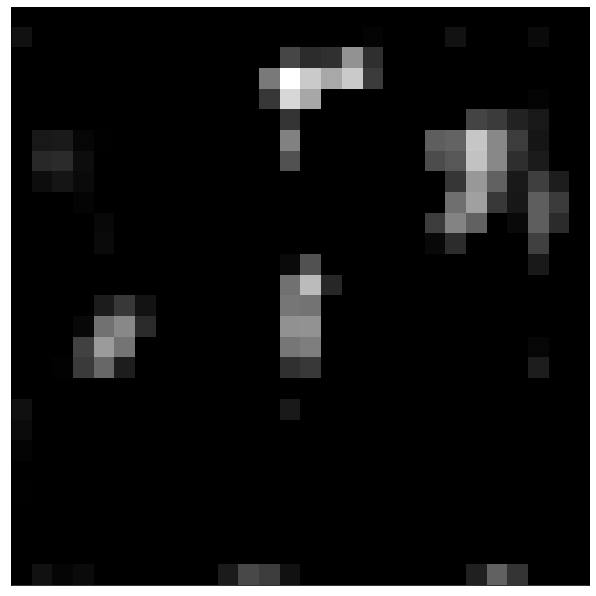

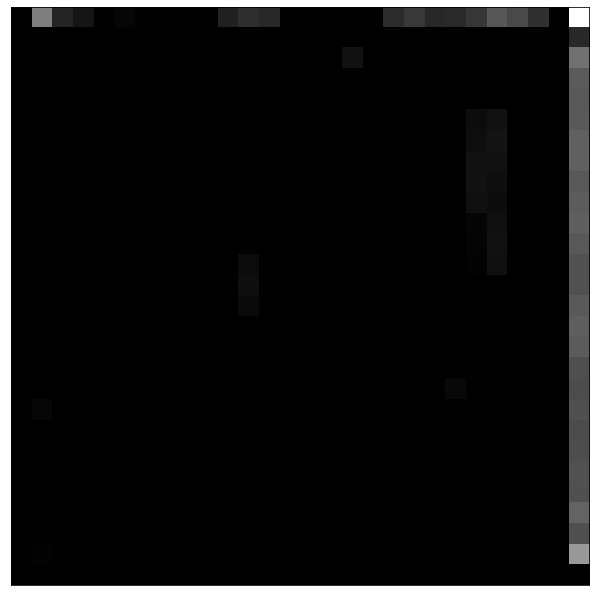

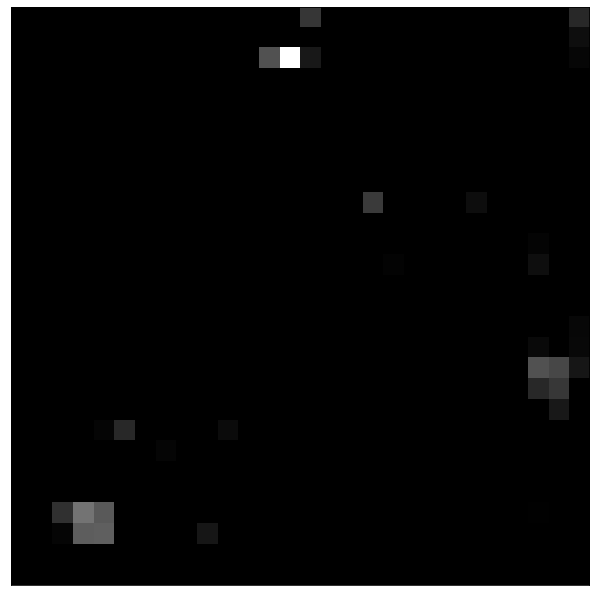

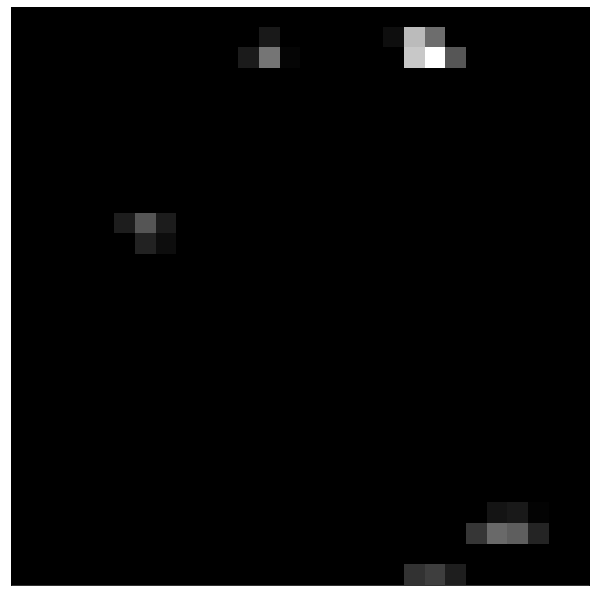

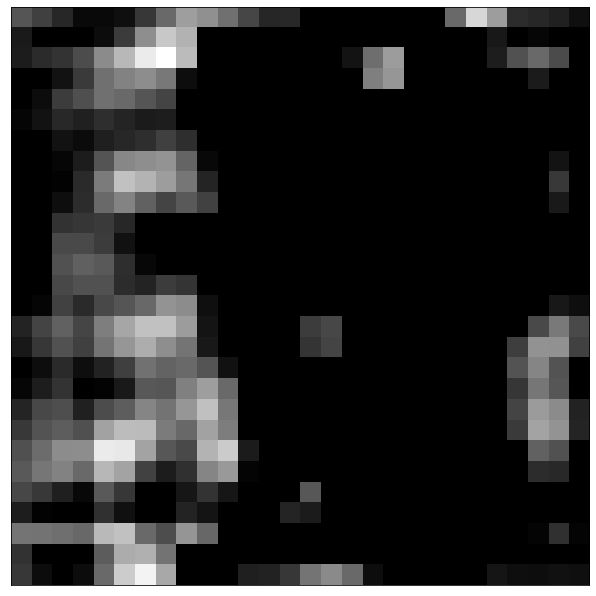

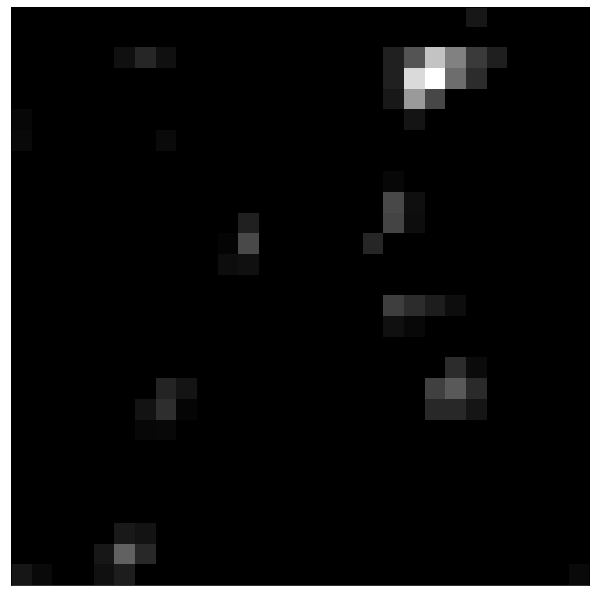

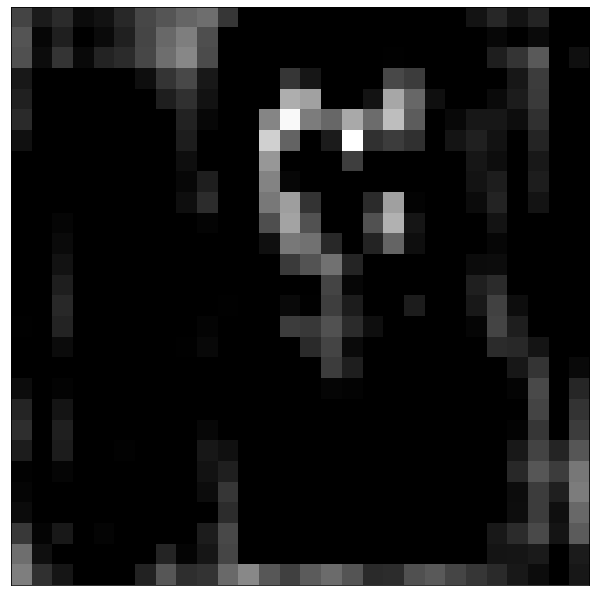

In [19]:
for _ in range(square):
    for _ in range(square):
        
        fig = plt.figure(figsize=(100, 100))

        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        
        ix += 1

plt.show()